In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.cluster import KMeans

In [2]:
X = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\2_combine_address_drop_parking_area\\X.csv')
y = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\ready_y.csv')

In [3]:
sub = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\initial\\submit_test.csv')
test = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\new\\2_combine_address_drop_parking_area\\testX.csv')

In [159]:
test_o = pd.read_csv('C:\\Users\\yunting\\Documents\\GitHub\\E.sun_conpetition\\data_set\\initial\\test.csv')

# Clustering

In [4]:
kmeans = KMeans(n_clusters=10)

In [5]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = pd.DataFrame((kmeans.labels_).tolist())

In [7]:
train_addlabels = pd.concat([X, labels, y],axis=1)
train_addlabels.head(3)

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,0,total_price
0,0,3,91,3728,17,1,37,1861,42.635964,1,...,1,4,1.4161,24219,17103,18674,3.0,572,3,6.476038e+05
1,1,1,29,7380,4,1,11,2512,7.157464,1,...,1,5,23.1373,551480,23835,18800,5.0,550,4,3.321452e+06
2,0,1,235,7971,17,0,73,2695,86.589412,1,...,1,4,23.1373,551480,23835,19289,1.0,625,4,9.570885e+06


In [164]:
#test labels
test_labels = kmeans.predict(test)
test_labels = pd.DataFrame(test_labels.tolist())

In [165]:
#test id & label concat
test_addlabels = pd.concat([test,test_o['building_id'], test_labels],axis=1)
test_addlabels.head()

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,building_id,0
0,0,2,57,5422,6,0,15,1277,56.238977,1,...,1,2,21.8424,122155,5593,18634,0.5,714,X5gsdTWGS3W7JJQB,9
1,0,1,7,1366,1,0,1,292,55.204531,1,...,1,10,191.4508,114926,600,20199,2.0,583,BTshNOJyKHnT2YIT,9
2,0,0,41,4480,0,0,0,1204,572.904189,1,...,1,4,62.7034,274819,4383,19769,0.5,641,dhdymr0lV8N5kZOT,2
3,0,9,276,10687,25,3,94,4540,47.064014,1,...,1,19,5.7138,222585,38956,20479,16.0,653,VEwyGGMcD56w5BOc,8
4,0,0,30,808,9,0,15,504,130.624446,1,...,1,13,22.8283,38708,1696,18164,3.0,624,wmUeMoJZfsqaSX9b,3


In [8]:
group0 = train_addlabels[0]==0
group1 = train_addlabels[0]==1
group2 = train_addlabels[0]==2
group3 = train_addlabels[0]==3
group4 = train_addlabels[0]==4
group5 = train_addlabels[0]==5
group6 = train_addlabels[0]==6
group7 = train_addlabels[0]==7
group8 = train_addlabels[0]==8
group9 = train_addlabels[0]==9

In [9]:
group_0 = train_addlabels[group0]
group_1 = train_addlabels[group1]
group_2 = train_addlabels[group2]
group_3 = train_addlabels[group3]
group_4 = train_addlabels[group4]
group_5 = train_addlabels[group5]
group_6 = train_addlabels[group6]
group_7 = train_addlabels[group7]
group_8 = train_addlabels[group8]
group_9 = train_addlabels[group9]

print('group_0',group_0.shape)
print('group_1',group_1.shape)
print('group_2',group_2.shape)
print('group_3',group_3.shape)
print('group_4',group_4.shape)
print('group_5',group_5.shape)
print('group_6',group_6.shape)
print('group_7',group_7.shape)
print('group_8',group_8.shape)
print('group_9',group_9.shape)

group_0 (3668, 4497)
group_1 (8050, 4497)
group_2 (6033, 4497)
group_3 (6660, 4497)
group_4 (2615, 4497)
group_5 (3554, 4497)
group_6 (10598, 4497)
group_7 (1371, 4497)
group_8 (8894, 4497)
group_9 (8557, 4497)


In [166]:
test_group0 = test_addlabels[0]==0
test_group1 = test_addlabels[0]==1
test_group2 = test_addlabels[0]==2
test_group3 = test_addlabels[0]==3
test_group4 = test_addlabels[0]==4
test_group5 = test_addlabels[0]==5
test_group6 = test_addlabels[0]==6
test_group7 = test_addlabels[0]==7
test_group8 = test_addlabels[0]==8
test_group9 = test_addlabels[0]==9

In [169]:
test_Group0 = test_addlabels[test_group0]
test_Group1 = test_addlabels[test_group1]
test_Group2 = test_addlabels[test_group2]
test_Group3 = test_addlabels[test_group3]
test_Group4 = test_addlabels[test_group4]
test_Group5 = test_addlabels[test_group5]
test_Group6 = test_addlabels[test_group6]
test_Group7 = test_addlabels[test_group7]
test_Group8 = test_addlabels[test_group8]
test_Group9 = test_addlabels[test_group9]

print('test_group_0',test_Group0.shape)
print('test_group_1',test_Group1.shape)
print('test_group_2',test_Group2.shape)
print('test_group_3',test_Group3.shape)
print('test_group_4',test_Group4.shape)
print('test_group_5',test_Group5.shape)
print('test_group_6',test_Group6.shape)
print('test_group_7',test_Group7.shape)
print('test_group_8',test_Group8.shape)
print('test_group_9',test_Group9.shape)

test_group_0 (614, 4497)
test_group_1 (1338, 4497)
test_group_2 (982, 4497)
test_group_3 (1122, 4497)
test_group_4 (404, 4497)
test_group_5 (553, 4497)
test_group_6 (1806, 4497)
test_group_7 (245, 4497)
test_group_8 (1483, 4497)
test_group_9 (1453, 4497)


In [10]:
a = np.percentile(group_0['land_area'], 75)
b = np.percentile(group_1['land_area'], 75)
c = np.percentile(group_2['land_area'], 75)
d = np.percentile(group_3['land_area'], 75)
e = np.percentile(group_4['land_area'], 75)
f = np.percentile(group_5['land_area'], 75)
g = np.percentile(group_6['land_area'], 75)
h = np.percentile(group_7['land_area'], 75)
i = np.percentile(group_8['land_area'], 75)
j = np.percentile(group_9['land_area'], 75)

In [74]:
mask_0 = group_0['land_area'] < a*1.5*1.5
Group0 = group_0[mask_0]
mask_1 = group_1['land_area'] < b*1.5*1.5
Group1 = group_1[mask_1]
mask_2 = group_2['land_area'] < c*1.5*1.5
Group2 = group_2[mask_2]
mask_3 = group_3['land_area'] < d*1.5*2
Group3 = group_3[mask_3]
mask_4 = group_4['land_area'] < e*1.5*1.5
Group4 = group_4[mask_4]
mask_5 = group_5['land_area'] < f*1.5*1.5
Group5 = group_5[mask_5]
mask_6 = group_6['land_area'] < g*1.5*1.5
Group6 = group_6[mask_6]
mask_7 = group_7['land_area'] < h*1.5*1.5
Group7 = group_7[mask_7]
mask_8 = group_8['land_area'] < i*1.5*1.5
Group8 = group_8[mask_8]
mask_9 = group_9['land_area'] < j*1.5*1.5
Group9 = group_9[mask_9]

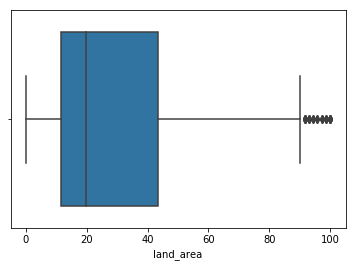

In [12]:
import seaborn as sns
sns.boxplot(Group9['land_area'])

In [13]:
group_1.shape

(8050, 4497)

In [14]:
Group1.shape

(7531, 4497)

# select from model

In [15]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn import  preprocessing , metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from xgboost import XGBRFRegressor 
import xgboost as xgb
from sklearn import svm
from sklearn.feature_selection import SelectFromModel

Group0

In [16]:
Group0.head(3)

,III_10,III_100,III_1000,III_10000,III_250,III_50,III_500,III_5000,III_MIN,III_index_1000,...,parking_way_2,total_floor,town_area,town_population,town_population_density,txn_dt,txn_floor,village_income_median,0,total_price
3,0,1,50,3904,3,1,5,2157,45.508654,1,...,0,24,14.7523,139259,9440,20385,13.0,950,0,1.421501e+07
6,0,1,139,5761,2,0,15,1591,87.008685,1,...,0,15,29.5578,238067,8054,20474,8.0,716,0,8.510296e+06
62,0,0,91,7371,6,0,16,1543,214.866294,1,...,0,7,7.4351,201309,27075,19467,4.0,606,0,1.011689e+07


In [453]:
XGroup0 = Group0.iloc[:, :-2]
yGroup0 = Group0['total_price']

In [458]:
#test
Xtest_Group0 = test_Group0.iloc[:, :-2]

In [454]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_0 = forest.fit(XGroup0, yGroup0)
model_ex_0 = SelectFromModel(forest_reg_0, prefit=True)
X0_ex = model_ex_0.transform(XGroup0)
X0_ex = XGroup0[XGroup0.columns[model_ex_0.get_support()]]

In [455]:
X0_ex.shape

(3610, 126)

In [459]:
#test 降維
Xtest_Group0_de = pd.DataFrame(model_ex_0.transform(Xtest_Group0))

In [456]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
extree = ExtraTreesRegressor(n_estimators=200,n_jobs=-1)
xgbreg = xgb.XGBRegressor(n_estimators=400,subsample=0.88,max_depth=3,colsample_bytree=0.88,
                             min_child_weight=2,reg_alpha=0.01,objective='reg:squarederror')

In [457]:
trainX_0 , testX_0 , train_y_0 , test_y_0 = train_test_split (X0_ex , yGroup0, test_size = 0.3)

In [460]:
extree_model_0 = extree.fit(trainX_0,train_y_0)
print('train',extree_model_0.score(trainX_0,train_y_0))
print('test',extree_model_0.score(testX_0,test_y_0))

train 1.0
test 0.9341964459810055


In [461]:
#test predict
Xtest_Group0_pre = extree_model_0.predict(Xtest_Group0_de)

In [462]:
Xtest_Group0_pre

array([1.05941948e+07, 1.21383757e+07, 6.28586194e+06, 1.37432523e+07,
       2.84312451e+06, 4.51730125e+07, 6.06028282e+06, 1.19083905e+07,
       3.00440662e+07, 1.30011355e+07, 6.47103102e+07, 1.73687394e+07,
       2.65363487e+07, 2.63283118e+07, 3.49965168e+06, 3.27131938e+06,
       5.79488245e+06, 1.44983238e+07, 4.44272435e+06, 2.78842380e+06,
       5.94544273e+07, 7.49947293e+06, 2.73860484e+07, 3.40685928e+07,
       4.59493396e+06, 7.94061227e+06, 8.93558605e+06, 7.19843259e+06,
       8.63343397e+07, 6.45720392e+06, 7.78728191e+06, 2.77868089e+07,
       6.70142159e+06, 1.19027646e+07, 4.83084750e+06, 1.42094312e+07,
       1.60608736e+07, 4.21160933e+06, 6.19174163e+06, 5.28383900e+07,
       5.47929869e+07, 1.26725216e+07, 7.88859514e+06, 5.39310403e+07,
       4.96675875e+06, 1.36922670e+07, 6.57485177e+06, 1.98339294e+07,
       5.56848471e+06, 3.86251560e+06, 2.18984835e+07, 5.93309411e+06,
       1.62925460e+07, 1.92743455e+07, 1.06000099e+07, 1.57752112e+07,
      

In [206]:
xgb_model_0 = xgbreg.fit(trainX_0,train_y_0)
print('train',xgb_model_0.score(trainX_0,train_y_0))
print('test',xgb_model_0.score(testX_0,test_y_0))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9877389534743991
test 0.9398699522113879


In [207]:
#test predict
xgb_Xtest_Group0_pre = xgb_model_0.predict(Xtest_Group0_de)

ValueError: feature_names mismatch: ['1   ', '2   ', '3   ', '4   ', '6   ', '7   ', '8   ', '15  ', '16  ', '17  ', '18  ', '20  ', '21  ', '22  ', '30  ', '31  ', '32  ', '34  ', '35  ', '36  ', '43  ', '44  ', '45  ', '46  ', '48  ', '49  ', '50  ', '58  ', '59  ', '60  ', '62  ', '63  ', '64  ', '72  ', '75  ', '77  ', '78  ', '79  ', '80  ', '81  ', '82  ', '83  ', '84  ', '91  ', '92  ', '93  ', '94  ', '95  ', '96  ', '97  ', '98  ', '106 ', '107 ', '110 ', '111 ', '112 ', '119 ', '120 ', '121 ', '122 ', '123 ', '124 ', '125 ', '126 ', '134 ', '135 ', '136 ', '138 ', '139 ', '140 ', '147 ', '148 ', '149 ', '150 ', '151 ', '152 ', '153 ', '154 ', '161 ', '162 ', '163 ', '164 ', '166 ', '167 ', '168 ', '175 ', '176 ', '177 ', '178 ', '180 ', '181 ', '182 ', '189 ', '190 ', '191 ', '192 ', '194 ', '195 ', '196 ', '915 ', '4159', '4216', '4446', '4447', '4448', '4449', '4451', '4457', '4461', '4475', '4476', '4477', '4478', '4479', '4480', '4481', '4483', '4484', '4485', '4486', '4488', '4489', '4490', '4491', '4492', '4493', '4494'] ['0  ', '1  ', '2  ', '3  ', '4  ', '5  ', '6  ', '7  ', '8  ', '9  ', '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', '64 ', '65 ', '66 ', '67 ', '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ', '77 ', '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ', '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126']
expected 189 , 139 , 75  , 150 , 125 , 140 , 45  , 15  , 4448, 147 , 2   , 4481, 4494, 148 , 163 , 1   , 98  , 50  , 4477, 36  , 4492, 16  , 180 , 4490, 63  , 20  , 4484, 178 , 191 , 4479, 112 , 59  , 126 , 168 , 4216, 48  , 83  , 96  , 46  , 4451, 4461, 4476, 7   , 18  , 122 , 121 , 4457, 164 , 4447, 162 , 4485, 81  , 91  , 119 , 120 , 123 , 72  , 97  , 152 , 176 , 134 , 138 , 30  , 21  , 58  , 194 , 4488, 151 , 4159, 192 , 106 , 93  , 60  , 167 , 3   , 49  , 77  , 136 , 4446, 35  , 124 , 153 , 915 , 177 , 4   , 32  , 4480, 17  , 4449, 79  , 94  , 4483, 92  , 4491, 4489, 195 , 196 , 62  , 31  , 6   , 78  , 154 , 82  , 22  , 4478, 181 , 64  , 80  , 190 , 8   , 4475, 84  , 149 , 95  , 135 , 43  , 4486, 107 , 44  , 166 , 182 , 175 , 4493, 110 , 34  , 111 , 161  in input data
training data did not have the following fields: 6  , 122, 43 , 107, 85 , 37 , 41 , 35 , 71 , 120, 57 , 70 , 54 , 64 , 112, 79 , 67 , 113, 27 , 22 , 59 , 108, 84 , 16 , 17 , 50 , 82 , 92 , 13 , 33 , 86 , 9  , 119, 124, 45 , 116, 14 , 101, 30 , 42 , 10 , 53 , 0  , 76 , 23 , 117, 90 , 95 , 36 , 99 , 97 , 111, 11 , 39 , 5  , 47 , 75 , 115, 110, 80 , 8  , 100, 38 , 69 , 126, 62 , 118, 56 , 78 , 104, 1  , 58 , 61 , 74 , 89 , 21 , 63 , 93 , 26 , 91 , 52 , 123, 24 , 28 , 98 , 15 , 4  , 12 , 65 , 87 , 2  , 29 , 25 , 51 , 125, 32 , 121, 66 , 105, 20 , 81 , 55 , 48 , 77 , 109, 44 , 7  , 68 , 103, 83 , 49 , 40 , 94 , 34 , 46 , 72 , 96 , 114, 106, 102, 3  , 18 , 31 , 60 , 73 , 88 , 19 

Group1

In [463]:
XGroup1 = Group1.iloc[:, :-2]
yGroup1 = Group1['total_price']

In [464]:
#test
Xtest_Group1 = test_Group1.iloc[:, :-2]

In [465]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_1 = forest.fit(XGroup1, yGroup1)
model_ex_1 = SelectFromModel(forest_reg_1, prefit=True)
X1_ex = model_ex_1.transform(XGroup1)
X1_ex = XGroup1[XGroup1.columns[model_ex_1.get_support()]]

In [466]:
X1_ex.shape

(7531, 108)

In [467]:
#test 降維
Xtest_Group1_de = pd.DataFrame(model_ex_1.transform(Xtest_Group1))

In [468]:
trainX_1 , testX_1 , train_y_1 , test_y_1 = train_test_split (X1_ex , yGroup1, test_size = 0.3)

In [471]:
extree_model_1 = extree.fit(trainX_1,train_y_1)
print('train',extree_model_1.score(trainX_1,train_y_1))
print('test',extree_model_1.score(testX_1,test_y_1))

train 1.0
test 0.913896376287657


In [472]:
#test predict
Xtest_Group1_pre = extree_model_1.predict(Xtest_Group1_de)

In [214]:
xgb_model_1 = xgbreg.fit(trainX_1,train_y_1)
print('train',xgb_model_1.score(trainX_1,train_y_1))
print('test',xgb_model_1.score(testX_1,test_y_1))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9805384532801228
test 0.9409612248344036


In [215]:
#test predict
xgb_Xtest_Group1_pre = xgb_model_1.predict(Xtest_Group1_de)

ValueError: feature_names mismatch: ['1   ', '2   ', '3   ', '4   ', '6   ', '7   ', '8   ', '15  ', '16  ', '17  ', '18  ', '20  ', '21  ', '22  ', '30  ', '31  ', '34  ', '35  ', '36  ', '44  ', '45  ', '46  ', '48  ', '49  ', '50  ', '58  ', '59  ', '60  ', '62  ', '63  ', '64  ', '72  ', '75  ', '77  ', '78  ', '79  ', '80  ', '82  ', '83  ', '84  ', '91  ', '92  ', '93  ', '94  ', '95  ', '96  ', '97  ', '98  ', '106 ', '107 ', '110 ', '111 ', '112 ', '119 ', '120 ', '121 ', '122 ', '124 ', '125 ', '126 ', '134 ', '135 ', '136 ', '138 ', '139 ', '140 ', '147 ', '148 ', '149 ', '150 ', '151 ', '152 ', '153 ', '154 ', '161 ', '162 ', '163 ', '164 ', '166 ', '167 ', '168 ', '175 ', '176 ', '177 ', '178 ', '180 ', '181 ', '182 ', '189 ', '190 ', '191 ', '192 ', '194 ', '195 ', '196 ', '3552', '4448', '4449', '4460', '4463', '4470', '4481', '4484', '4488', '4489', '4491', '4492', '4493', '4494'] ['0  ', '1  ', '2  ', '3  ', '4  ', '5  ', '6  ', '7  ', '8  ', '9  ', '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', '64 ', '65 ', '66 ', '67 ', '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ', '77 ', '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ', '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', '100', '101', '102', '103', '104', '105', '106', '107', '108']
expected 189 , 139 , 75  , 150 , 4470, 125 , 140 , 45  , 15  , 4448, 147 , 2   , 4481, 4494, 148 , 163 , 1   , 98  , 50  , 36  , 4492, 16  , 180 , 63  , 20  , 4484, 178 , 191 , 112 , 59  , 126 , 168 , 48  , 3552, 4460, 83  , 96  , 46  , 7   , 18  , 122 , 121 , 164 , 162 , 91  , 119 , 120 , 72  , 97  , 152 , 176 , 134 , 138 , 30  , 21  , 58  , 194 , 4488, 151 , 192 , 106 , 93  , 60  , 167 , 3   , 49  , 77  , 136 , 35  , 124 , 153 , 177 , 4   , 17  , 4449, 79  , 94  , 92  , 4491, 4463, 195 , 4489, 196 , 62  , 31  , 6   , 78  , 154 , 82  , 22  , 181 , 64  , 80  , 190 , 8   , 84  , 149 , 95  , 135 , 107 , 44  , 166 , 182 , 175 , 4493, 110 , 34  , 111 , 161  in input data
training data did not have the following fields: 6  , 43 , 107, 85 , 37 , 41 , 35 , 71 , 57 , 70 , 54 , 64 , 79 , 67 , 27 , 22 , 59 , 108, 84 , 16 , 17 , 50 , 82 , 92 , 13 , 33 , 86 , 9  , 45 , 14 , 101, 30 , 42 , 10 , 53 , 0  , 76 , 23 , 90 , 95 , 36 , 99 , 97 , 11 , 39 , 5  , 47 , 75 , 80 , 8  , 100, 38 , 69 , 62 , 56 , 78 , 104, 1  , 58 , 61 , 74 , 89 , 21 , 63 , 93 , 26 , 91 , 52 , 24 , 28 , 98 , 15 , 4  , 12 , 65 , 87 , 2  , 29 , 25 , 51 , 32 , 66 , 105, 20 , 81 , 55 , 48 , 77 , 44 , 7  , 68 , 103, 83 , 49 , 40 , 94 , 34 , 46 , 72 , 96 , 106, 102, 3  , 18 , 31 , 60 , 73 , 88 , 19 

Group2

In [473]:
XGroup2 = Group2.iloc[:, :-2]
yGroup2 = Group2['total_price']
XGroup2.shape

(5534, 4495)

In [474]:
#test
Xtest_Group2 = test_Group2.iloc[:, :-2]
Xtest_Group2.shape

(982, 4495)

In [475]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_2 = forest.fit(XGroup2, yGroup2)
model_ex_2 = SelectFromModel(forest_reg_2, prefit=True)
X2_ex = model_ex_2.transform(XGroup2)
X2_ex = XGroup2[XGroup2.columns[model_ex_2.get_support()]]

In [476]:
X2_ex.shape

(5534, 128)

In [477]:
Xtest_Group2_de.shape

(982, 127)

In [478]:
#test 降維
Xtest_Group2_de = pd.DataFrame(model_ex_2.transform(Xtest_Group2))

In [484]:
trainX_2 , testX_2 , train_y_2 , test_y_2 = train_test_split (X2_ex , yGroup2, test_size = 0.3)

In [489]:
extree_model_2 = extree.fit(trainX_2,train_y_2)
print('train',extree_model_2.score(trainX_2,train_y_2))
print('test',extree_model_2.score(testX_2,test_y_2))

train 1.0
test 0.8642832295391535


In [490]:
#test predict
Xtest_Group2_pre = extree_model_2.predict(Xtest_Group2_de)

In [238]:
xgb_model_2 = xgbreg.fit(trainX_2,train_y_2)
print('train',xgb_model_2.score(trainX_2,train_y_2))
print('test',xgb_model_2.score(testX_2,test_y_2))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9823470041936401
test 0.9028607349121793


In [241]:
#test predict
xgb_Xtest_Group2_de = pd.DataFrame(Xtest_Group2_de)
xgb_Xtest_Group2_pre = xgb_model_2.predict(xgb_Xtest_Group2_de)

ValueError: feature_names mismatch: ['1   ', '2   ', '3   ', '4   ', '6   ', '7   ', '8   ', '15  ', '16  ', '17  ', '18  ', '20  ', '21  ', '22  ', '30  ', '31  ', '34  ', '35  ', '36  ', '43  ', '44  ', '45  ', '46  ', '48  ', '49  ', '50  ', '58  ', '59  ', '60  ', '62  ', '63  ', '64  ', '72  ', '73  ', '75  ', '77  ', '78  ', '79  ', '80  ', '82  ', '83  ', '84  ', '91  ', '92  ', '93  ', '94  ', '95  ', '96  ', '97  ', '98  ', '106 ', '107 ', '108 ', '110 ', '111 ', '112 ', '115 ', '119 ', '120 ', '121 ', '122 ', '124 ', '125 ', '126 ', '134 ', '135 ', '136 ', '138 ', '139 ', '140 ', '147 ', '148 ', '149 ', '150 ', '151 ', '152 ', '153 ', '154 ', '161 ', '162 ', '163 ', '164 ', '166 ', '167 ', '168 ', '175 ', '176 ', '177 ', '178 ', '180 ', '181 ', '182 ', '189 ', '190 ', '191 ', '192 ', '194 ', '195 ', '196 ', '1443', '1555', '4446', '4447', '4448', '4449', '4451', '4457', '4460', '4462', '4463', '4475', '4476', '4477', '4478', '4480', '4481', '4482', '4483', '4484', '4486', '4488', '4489', '4490', '4491', '4492', '4493', '4494'] ['0  ', '1  ', '2  ', '3  ', '4  ', '5  ', '6  ', '7  ', '8  ', '9  ', '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', '64 ', '65 ', '66 ', '67 ', '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ', '77 ', '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ', '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126']
expected 189 , 139 , 75  , 115 , 150 , 125 , 140 , 45  , 15  , 4448, 147 , 2   , 4481, 4494, 148 , 163 , 4462, 1   , 98  , 50  , 4477, 36  , 4492, 16  , 180 , 4490, 63  , 1555, 20  , 4484, 178 , 191 , 112 , 59  , 126 , 168 , 48  , 108 , 4460, 83  , 96  , 46  , 4451, 4476, 7   , 18  , 122 , 121 , 4457, 164 , 4447, 162 , 91  , 1443, 119 , 120 , 72  , 97  , 152 , 176 , 134 , 138 , 30  , 21  , 58  , 194 , 4488, 151 , 192 , 106 , 93  , 60  , 167 , 3   , 49  , 77  , 4482, 136 , 4446, 35  , 124 , 153 , 177 , 4   , 73  , 4480, 17  , 4449, 79  , 94  , 4483, 92  , 4491, 4463, 195 , 4489, 196 , 62  , 31  , 6   , 78  , 154 , 82  , 22  , 4478, 181 , 64  , 80  , 190 , 8   , 4475, 84  , 149 , 95  , 135 , 43  , 4486, 107 , 44  , 166 , 182 , 175 , 4493, 110 , 34  , 111 , 161  in input data
training data did not have the following fields: 6  , 122, 43 , 107, 85 , 37 , 41 , 35 , 71 , 120, 57 , 70 , 54 , 64 , 112, 79 , 67 , 113, 27 , 22 , 59 , 108, 84 , 16 , 17 , 50 , 82 , 92 , 13 , 33 , 86 , 9  , 119, 124, 45 , 116, 14 , 101, 30 , 42 , 10 , 53 , 0  , 76 , 23 , 117, 90 , 95 , 36 , 99 , 97 , 111, 11 , 39 , 5  , 47 , 75 , 115, 110, 80 , 8  , 100, 38 , 69 , 126, 62 , 118, 56 , 78 , 104, 1  , 58 , 61 , 74 , 89 , 21 , 63 , 93 , 26 , 91 , 52 , 123, 24 , 28 , 98 , 15 , 4  , 12 , 65 , 87 , 2  , 29 , 25 , 51 , 125, 32 , 121, 66 , 105, 20 , 81 , 55 , 48 , 77 , 109, 44 , 7  , 68 , 103, 83 , 49 , 40 , 94 , 34 , 46 , 72 , 96 , 114, 106, 102, 3  , 18 , 31 , 60 , 73 , 88 , 19 

Group3

In [491]:
XGroup3 = Group3.iloc[:, :-2]
yGroup3 = Group3['total_price']

In [492]:
#test
Xtest_Group3 = test_Group3.iloc[:, :-2]
Xtest_Group3.shape

(1122, 4495)

In [493]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_3 = forest.fit(XGroup3, yGroup3)
model_ex_3 = SelectFromModel(forest_reg_3, prefit=True)
X3_ex = model_ex_3.transform(XGroup3)
X3_ex = XGroup3[XGroup3.columns[model_ex_3.get_support()]]

In [494]:
X3_ex.shape

(6458, 136)

In [495]:
#test 降維
Xtest_Group3_de = pd.DataFrame(model_ex_3.transform(Xtest_Group3))

In [496]:
trainX_3 , testX_3 , train_y_3 , test_y_3 = train_test_split (X3_ex , yGroup3, test_size = 0.2)

In [498]:
extree_model_3 = extree.fit(trainX_3,train_y_3)
print('train',extree_model_3.score(trainX_3,train_y_3))
print('test',extree_model_3.score(testX_3,test_y_3))

train 1.0
test 0.8287743435695583


In [499]:
#test predict
Xtest_Group3_pre = extree_model_3.predict(Xtest_Group3_de)

In [264]:
xgb_model_3 = xgbreg.fit(trainX_3,train_y_3)
print('train',xgb_model_3.score(trainX_3,train_y_3))
print('test',xgb_model_3.score(testX_3,test_y_3))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9779783802819778
test 0.912491471613027


Group4

In [500]:
XGroup4 = Group4.iloc[:, :-2]
yGroup4 = Group4['total_price']

In [501]:
#test
Xtest_Group4 = test_Group4.iloc[:, :-2]
Xtest_Group4.shape

(404, 4495)

In [502]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_4 = forest.fit(XGroup4, yGroup4)
model_ex_4 = SelectFromModel(forest_reg_4, prefit=True)
X4_ex = model_ex_4.transform(XGroup4)
X4_ex = XGroup4[XGroup4.columns[model_ex_4.get_support()]]

In [503]:
X4_ex.shape

(2494, 86)

In [504]:
#test 降維
Xtest_Group4_de = pd.DataFrame(model_ex_4.transform(Xtest_Group4))

In [505]:
trainX_4 , testX_4 , train_y_4 , test_y_4 = train_test_split (X4_ex , yGroup4, test_size = 0.3)

In [506]:
extree_model_4 = extree.fit(trainX_4,train_y_4)
print('train',extree_model_4.score(trainX_4,train_y_4))
print('test',extree_model_4.score(testX_4,test_y_4))

train 1.0
test 0.9402382273614608


In [507]:
#test predict
Xtest_Group4_pre = extree_model_4.predict(Xtest_Group4_de)

In [87]:
xgb_model_4 = xgbreg.fit(trainX_4,train_y_4)
print('train',xgb_model_4.score(trainX_4,train_y_4))
print('test',xgb_model_4.score(testX_4,test_y_4))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9976618025296127
test 0.9347879619964856


Group5

In [508]:
XGroup5 = Group5.iloc[:, :-2]
yGroup5 = Group5['total_price']

In [509]:
#test
Xtest_Group5 = test_Group5.iloc[:, :-2]
Xtest_Group5.shape

(553, 4495)

In [510]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_5 = forest.fit(XGroup5, yGroup5)
model_ex_5 = SelectFromModel(forest_reg_5, prefit=True)
X5_ex = model_ex_5.transform(XGroup5)
X5_ex = XGroup5[XGroup5.columns[model_ex_5.get_support()]]

In [511]:
X5_ex.shape

(3401, 100)

In [512]:
#test 降維
Xtest_Group5_de = pd.DataFrame(model_ex_5.transform(Xtest_Group5))

In [513]:
trainX_5 , testX_5 , train_y_5 , test_y_5 = train_test_split (X5_ex , yGroup5, test_size = 0.2)

In [514]:
extree_model_5 = extree.fit(trainX_5,train_y_5)
print('train',extree_model_5.score(trainX_5,train_y_5))
print('test',extree_model_5.score(testX_5,test_y_5))

train 1.0
test 0.9344141651815459


In [515]:
#test predict
Xtest_Group5_pre = extree_model_5.predict(Xtest_Group5_de)

In [290]:
xgb_model_5 = xgbreg.fit(trainX_5,train_y_5)
print('train',xgb_model_5.score(trainX_5,train_y_5))
print('test',xgb_model_5.score(testX_5,test_y_5))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.995387273482924
test 0.9514434782590745


Group6

In [525]:
XGroup6 = Group6.iloc[:, :-2]
yGroup6 = Group6['total_price']

In [526]:
#test
Xtest_Group6 = test_Group6.iloc[:, :-2]
Xtest_Group6.shape

(1806, 4495)

In [527]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_6 = forest.fit(XGroup6, yGroup6)
model_ex_6 = SelectFromModel(forest_reg_6, prefit=True)
X6_ex = model_ex_6.transform(XGroup6)
X6_ex = XGroup6[XGroup6.columns[model_ex_6.get_support()]]

In [528]:
X6_ex.shape

(10268, 131)

In [529]:
#test 降維
Xtest_Group6_de = pd.DataFrame(model_ex_6.transform(Xtest_Group6))

In [530]:
trainX_6 , testX_6 , train_y_6 , test_y_6 = train_test_split (X6_ex , yGroup6, test_size = 0.3)

In [531]:
extree_model_6 = extree.fit(trainX_6,train_y_6)
print('train',extree_model_6.score(trainX_6,train_y_6))
print('test',extree_model_6.score(testX_6,test_y_6))

train 1.0
test 0.9198017017713027


In [532]:
#test predict
Xtest_Group6_pre = extree_model_6.predict(Xtest_Group6_de)

In [106]:
xgb_model_6 = xgbreg.fit(trainX_6,train_y_6)
print('train',xgb_model_6.score(trainX_6,train_y_6))
print('test',xgb_model_6.score(testX_6,test_y_6))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9826569751368419
test 0.8763205653233879


Group7

In [533]:
XGroup7 = Group7.iloc[:, :-2]
yGroup7 = Group7['total_price']

In [534]:
#test
Xtest_Group7 = test_Group7.iloc[:, :-2]
Xtest_Group7.shape

(245, 4495)

In [535]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_7 = forest.fit(XGroup7, yGroup7)
model_ex_7 = SelectFromModel(forest_reg_7, prefit=True)
X7_ex = model_ex_7.transform(XGroup7)
X7_ex = XGroup7[XGroup7.columns[model_ex_7.get_support()]]

In [536]:
X7_ex.shape

(1315, 110)

In [537]:
#test 降維
Xtest_Group7_de = pd.DataFrame(model_ex_7.transform(Xtest_Group7))

In [538]:
trainX_7 , testX_7 , train_y_7 , test_y_7 = train_test_split (X7_ex , yGroup7, test_size = 0.2)

In [550]:
extree_model_7 = extree.fit(trainX_7,train_y_7)
print('train',extree_model_7.score(trainX_7,train_y_7))
print('test',extree_model_7.score(testX_7,test_y_7))

train 1.0
test 0.9306425029097899


In [551]:
#test predict
Xtest_Group7_pre = extree_model_7.predict(Xtest_Group7_de)

In [318]:
xgb_model_7 = xgbreg.fit(trainX_7,train_y_7)
print('train',xgb_model_7.score(trainX_7,train_y_7))
print('test',xgb_model_7.score(testX_7,test_y_7))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9967742412708047
test 0.9253580838616257


Group8

In [552]:
XGroup8 = Group8.iloc[:, :-2]
yGroup8 = Group8['total_price']

In [553]:
#test
Xtest_Group8 = test_Group8.iloc[:, :-2]
Xtest_Group8.shape

(1483, 4495)

In [554]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_8 = forest.fit(XGroup8, yGroup8)
model_ex_8 = SelectFromModel(forest_reg_8, prefit=True)
X8_ex = model_ex_8.transform(XGroup8)
X8_ex = XGroup8[XGroup8.columns[model_ex_8.get_support()]]

In [555]:
X8_ex.shape

(8288, 131)

In [556]:
#test 降維
Xtest_Group8_de = pd.DataFrame(model_ex_8.transform(Xtest_Group8))

In [557]:
trainX_8 , testX_8 , train_y_8 , test_y_8 = train_test_split (X8_ex , yGroup8, test_size = 0.2)

In [558]:
extree_model_8 = extree.fit(trainX_8,train_y_8)
print('train',extree_model_8.score(trainX_8,train_y_8))
print('test',extree_model_8.score(testX_8,test_y_8))

train 1.0
test 0.9605085198161263


In [559]:
#test predict
Xtest_Group8_pre = extree_model_8.predict(Xtest_Group8_de)

In [326]:
xgb_model_8 = xgbreg.fit(trainX_8,train_y_8)
print('train',xgb_model_8.score(trainX_8,train_y_8))
print('test',xgb_model_8.score(testX_8,test_y_8))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9842820844913304
test 0.9596723874498532


Group9

In [560]:
XGroup9 = Group9.iloc[:, :-2]
yGroup9 = Group9['total_price']

In [561]:
#test
Xtest_Group9 = test_Group9.iloc[:, :-2]
Xtest_Group9.shape

(1453, 4495)

In [562]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_9 = forest.fit(XGroup9, yGroup9)
model_ex_9 = SelectFromModel(forest_reg_9, prefit=True)
X9_ex = model_ex_9.transform(XGroup9)
X9_ex = XGroup9[XGroup9.columns[model_ex_9.get_support()]]

In [563]:
X9_ex.shape

(8310, 133)

In [564]:
#test 降維
Xtest_Group9_de = pd.DataFrame(model_ex_9.transform(Xtest_Group9))
Xtest_Group9_de.shape

(1453, 133)

In [565]:
trainX_9 , testX_9 , train_y_9 , test_y_9 = train_test_split (X9_ex , yGroup9, test_size = 0.3)

In [569]:
extree_model_9 = extree.fit(trainX_9,train_y_9)
print('train',extree_model_9.score(trainX_9,train_y_9))
print('test',extree_model_9.score(testX_9,test_y_9))

train 1.0
test 0.8156750115024587


In [570]:
#test predict
Xtest_Group9_pre = extree_model_9.predict(Xtest_Group9_de)

In [136]:
xgb_model_9 = xgbreg.fit(trainX_9,train_y_9)
print('train',xgb_model_9.score(trainX_9,train_y_9))
print('test',xgb_model_9.score(testX_9,test_y_9))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9760138124631996
test 0.682661598788691


Group39

In [413]:
print(Group3.shape, Group9.shape)
Group39 = pd.concat([Group3, Group9],axis=0)
print(Group39.shape)

(6458, 4497) (8310, 4497)
(14768, 4497)


In [422]:
test_Group39 = pd.concat([test_Group3, test_Group9],axis=0)
print(test_Group3.shape, test_Group9.shape)
test_Group39.shape

(1122, 4497) (1453, 4497)


(2575, 4497)

In [423]:
#test
Xtest_Group39 = pd.DataFrame(preprocessing.scale(test_Group39.iloc[:, :-2]))
Xtest_Group39.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


(2575, 4495)

In [416]:
XGroup39 = pd.DataFrame(preprocessing.scale(Group39.iloc[:, :-2]))
yGroup39 = Group39['total_price']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [417]:
forest = RandomForestRegressor(n_estimators=400,n_jobs=-1)
forest_reg_39 = forest.fit(XGroup39, yGroup39)
model_ex_39 = SelectFromModel(forest_reg_39, prefit=True)
X39_ex = model_ex_39.transform(XGroup39)
X39_ex = XGroup39[XGroup39.columns[model_ex_39.get_support()]]

In [418]:
X39_ex.shape

(14768, 135)

In [424]:
#test 降維
Xtest_Group39_de = pd.DataFrame(model_ex_39.transform(Xtest_Group39))
Xtest_Group39_de.shape

(2575, 135)

In [419]:
trainX_39 , testX_39 , train_y_39 , test_y_39 = train_test_split (X39_ex , yGroup39, test_size = 0.3)

In [425]:
extree_model_39 = extree.fit(trainX_39,train_y_39)
print('train',extree_model_39.score(trainX_39,train_y_39))
print('test',extree_model_39.score(testX_39,test_y_39))

train 1.0
test 0.887324419658926


In [426]:
#test predict
Xtest_Group39_pre = extree_model_39.predict(Xtest_Group39_de)

In [427]:
Xtest_Group39_pre.shape

(2575,)

In [429]:
Xtest_Group9_pre = Xtest_Group39_pre[1122:]
Xtest_Group9_pre.shape

(1453,)

In [421]:
xgb_model_39 = xgbreg.fit(trainX_39,train_y_39)
print('train',xgb_model_39.score(trainX_39,train_y_39))
print('test',xgb_model_39.score(testX_39,test_y_39))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train 0.9633404082983927
test 0.8273253662963939


# combine

In [571]:
test0_pre = pd.DataFrame(Xtest_Group0_pre)
test0_id = pd.DataFrame(test_Group0['building_id'])
test0_id.reset_index(inplace=True)
test0_sub = pd.concat([test0_id,test0_pre],axis=1)

In [572]:
test1_pre = pd.DataFrame(Xtest_Group1_pre)
test1_id = pd.DataFrame(test_Group1['building_id'])
test1_id.reset_index(inplace=True)
test1_sub = pd.concat([test1_id,test1_pre],axis=1)

In [573]:
test2_pre = pd.DataFrame(Xtest_Group2_pre)
test2_id = pd.DataFrame(test_Group2['building_id'])
test2_id.reset_index(inplace=True)
test2_sub = pd.concat([test2_id,test2_pre],axis=1)

In [574]:
test3_pre = pd.DataFrame(Xtest_Group3_pre)
test3_id = pd.DataFrame(test_Group3['building_id'])
test3_id.reset_index(inplace=True)
test3_sub = pd.concat([test3_id,test3_pre],axis=1)

In [575]:
test4_pre = pd.DataFrame(Xtest_Group4_pre)
test4_id = pd.DataFrame(test_Group4['building_id'])
test4_id.reset_index(inplace=True)
test4_sub = pd.concat([test4_id,test4_pre],axis=1)

In [576]:
test5_pre = pd.DataFrame(Xtest_Group5_pre)
test5_id = pd.DataFrame(test_Group5['building_id'])
test5_id.reset_index(inplace=True)
test5_sub = pd.concat([test5_id,test5_pre],axis=1)

In [577]:
test6_pre = pd.DataFrame(Xtest_Group6_pre)
test6_id = pd.DataFrame(test_Group6['building_id'])
test6_id.reset_index(inplace=True)
test6_sub = pd.concat([test6_id,test6_pre],axis=1)

In [578]:
test7_pre = pd.DataFrame(Xtest_Group7_pre)
test7_id = pd.DataFrame(test_Group7['building_id'])
test7_id.reset_index(inplace=True)
test7_sub = pd.concat([test7_id,test7_pre],axis=1)

In [579]:
test8_pre = pd.DataFrame(Xtest_Group8_pre)
test8_id = pd.DataFrame(test_Group8['building_id'])
test8_id.reset_index(inplace=True)
test8_sub = pd.concat([test8_id,test8_pre],axis=1)

In [580]:
test9_pre = pd.DataFrame(Xtest_Group9_pre)
test9_id = pd.DataFrame(test_Group9['building_id'])
test9_id.reset_index(inplace=True)
test9_sub = pd.concat([test9_id,test9_pre],axis=1)

In [581]:
subbmit = pd.concat([test0_sub,test1_sub,test2_sub,test3_sub,test4_sub,test5_sub,test6_sub,test7_sub,test8_sub,test9_sub])

In [582]:
print(test0_sub.shape,
test1_sub.shape,
test2_sub.shape,
test3_sub.shape,
test4_sub.shape,
test5_sub.shape,
test6_sub.shape,
test7_sub.shape,
test8_sub.shape,
test9_sub.shape,
subbmit.shape)

(614, 3) (1338, 3) (982, 3) (1122, 3) (404, 3) (553, 3) (1806, 3) (245, 3) (1483, 3) (1453, 3) (10000, 3)


In [583]:
subbmit

,index,building_id,0
0,12,eM2NppIOwzW0o8iy,1.059419e+07
1,27,JPWqZbLq0VNC0yKI,1.213838e+07
2,34,YLKpsew5dW75vksT,6.285862e+06
3,121,E0gBmfDjtixwUA0k,1.374325e+07
4,168,AzPpJz3T62VmkxrS,2.843125e+06
5,171,MwV3Ve3wqFjXXIEQ,4.517301e+07
6,176,QQrkTCqzHS3JKGyi,6.060283e+06
7,183,mbZY6kO9JRKSIYJZ,1.190839e+07
8,258,F9POw6Q1VfzwmvZl,3.004407e+07
9,288,N7FRMJ3hgQwfo1iN,1.300114e+07


In [584]:
answer = sub.merge(subbmit,on = 'building_id')
answer

,building_id,total_price,index,0
0,X5gsdTWGS3W7JJQB,0,0,1.277081e+07
1,BTshNOJyKHnT2YIT,0,1,3.629924e+06
2,dhdymr0lV8N5kZOT,0,2,1.089540e+07
3,VEwyGGMcD56w5BOc,0,3,5.899362e+06
4,wmUeMoJZfsqaSX9b,0,4,1.266749e+06
5,EtBjGAHmHCe9t7TZ,0,5,3.857482e+06
6,hPNH34vmaZtvBtqc,0,6,1.240998e+07
7,wXjeI38bYDMJJwZC,0,7,7.097653e+06
8,fxZSGX6aPAFKU8W4,0,8,1.663499e+06
9,ewr0Fx6ign87OwaV,0,9,3.595638e+06


In [585]:
answer['total_price'] = answer[0]
answer

,building_id,total_price,index,0
0,X5gsdTWGS3W7JJQB,1.277081e+07,0,1.277081e+07
1,BTshNOJyKHnT2YIT,3.629924e+06,1,3.629924e+06
2,dhdymr0lV8N5kZOT,1.089540e+07,2,1.089540e+07
3,VEwyGGMcD56w5BOc,5.899362e+06,3,5.899362e+06
4,wmUeMoJZfsqaSX9b,1.266749e+06,4,1.266749e+06
5,EtBjGAHmHCe9t7TZ,3.857482e+06,5,3.857482e+06
6,hPNH34vmaZtvBtqc,1.240998e+07,6,1.240998e+07
7,wXjeI38bYDMJJwZC,7.097653e+06,7,7.097653e+06
8,fxZSGX6aPAFKU8W4,1.663499e+06,8,1.663499e+06
9,ewr0Fx6ign87OwaV,3.595638e+06,9,3.595638e+06


In [446]:
Answer = answer.iloc[:, :-2]
Answer

,building_id,total_price
0,X5gsdTWGS3W7JJQB,1.525316e+07
1,BTshNOJyKHnT2YIT,4.593591e+06
2,dhdymr0lV8N5kZOT,7.251619e+06
3,VEwyGGMcD56w5BOc,7.176508e+06
4,wmUeMoJZfsqaSX9b,2.382019e+06
5,EtBjGAHmHCe9t7TZ,3.687853e+06
6,hPNH34vmaZtvBtqc,9.353441e+06
7,wXjeI38bYDMJJwZC,9.497528e+06
8,fxZSGX6aPAFKU8W4,1.513216e+06
9,ewr0Fx6ign87OwaV,8.516537e+06


In [586]:
Answer.to_csv('Answer1.csv')